In [20]:

# 🌳 Decision Tree Example: Classifying Fruit Types 🍎🍌🍊

# ------------------------------------------
# Importing necessary libraries
# ------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

from decision_tree import DecisionTreeModel


In [21]:
# ------------------------------------------
# Step 1: Create Synthetic Fruit Dataset
# ------------------------------------------

# 🧪 Each fruit has: weight (grams), texture (0 = smooth, 1 = bumpy)
# 🍎 Apples → heavy + smooth
# 🍊 Oranges → light + bumpy
# 🍌 Bananas → medium + smooth

# Set a random seed so that every time we run this, we get the same random numbers
np.random.seed(42)

# Define how many samples (rows of data) we want
n_samples = 150  # 50 apples + 50 oranges + 50 bananas

# --- Feature 1: Weight (grams) ---
# We're generating random weights using a bell curve (normal distribution)
# np.random.normal(mean, standard_deviation, count)
# For example: apples are about 200g, oranges ~150g, bananas ~170g

weight = np.concatenate([  # Combine all fruit weights into one long array
    np.random.normal(200, 10, 50),  # Apple weights
    np.random.normal(150, 15, 50),  # Orange weights
    np.random.normal(170, 10, 50)   # Banana weights
]).reshape(-1, 1)  # reshape(-1, 1) turns the 1D array into a column (2D array)

# --- Feature 2: Texture ---
# Texture is a simple value: 0 = smooth, 1 = bumpy
# Apples and bananas are smooth, oranges are bumpy
texture = np.concatenate([
    np.zeros(50),  # 50 smooth apples (0)
    np.ones(50),   # 50 bumpy oranges (1)
    np.zeros(50)   # 50 smooth bananas (0)
]).reshape(-1, 1)

# --- Combine features into a single dataset ---
# np.hstack stacks arrays side-by-side (columns)
# X will be a matrix with two columns: [weight, texture]
X = np.hstack([weight, texture])

# --- Labels: What type of fruit is it? ---
# We'll assign numbers to each fruit type:
# 0 = Apple, 1 = Orange, 2 = Banana

y = np.concatenate([
    np.zeros(50),         # 50 apples → label 0
    np.ones(50),          # 50 oranges → label 1
    np.full(50, 2)        # 50 bananas → label 2 (np.full means fill with 2)
]).reshape(-1, 1)

In [22]:
# ------------------------------------------
# Step 2: Split the dataset into training and testing sets
# ------------------------------------------

# We want to train on some of the data and test on the rest
# train_test_split splits the data into 80% training, 20% testing

X_train, X_test, y_train, y_test = train_test_split(
    X, y,          # Our features (X) and labels (y)
    test_size=0.2, # 20% will go to the test set
    random_state=42  # Ensures we always get the same split
)

In [23]:
# ------------------------------------------
# Step 3: Create and train the model
# ------------------------------------------

# We create an instance of our decision tree model
# max_depth limits how deep the tree can grow (to prevent overfitting)
model = DecisionTreeModel(max_depth=3)

# Train the model using our training data
# The model will "learn" patterns in the data
model.train(X_train, y_train)

In [24]:
# ------------------------------------------
# Step 4: Make predictions on the test set
# ------------------------------------------

# Use the trained model to predict fruit types for the test set
y_pred = model.predict(X_test)

✅ Accuracy: 0.93

📊 Classification Report:
              precision    recall  f1-score   support

       Apple       0.83      1.00      0.91        10
      Orange       1.00      1.00      1.00         9
      Banana       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



c:\Users\Logan\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


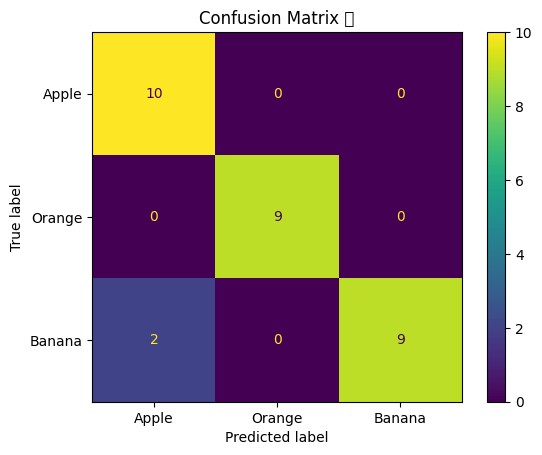

In [25]:
# ------------------------------------------
# Step 5: Evaluate model performance
# ------------------------------------------

# Calculate accuracy = % of predictions that were correct
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy: {accuracy:.2f}")  # Example: 0.93 → 93% correct

# Print more detailed performance metrics
# This shows how well we did for each fruit type
print("\n📊 Classification Report:")
print(classification_report(
    y_test, y_pred,  # Actual labels vs predicted
    target_names=["Apple", "Orange", "Banana"]  # Human-readable names for classes 0, 1, 2
))

# Display a confusion matrix:
# This shows what the model got right or wrong in a table
disp = ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    display_labels=["Apple", "Orange", "Banana"]
)
plt.title("Confusion Matrix 📉")  # Give the chart a title
plt.grid(False)  # Remove background grid for a cleaner look
plt.show()  # Show the chart



🌟 Feature Importance:
Weight:  0.44
Texture: 0.56


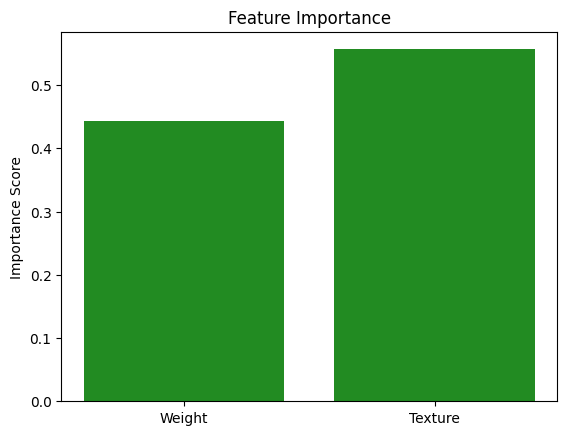

In [26]:
# ------------------------------------------
# Step 6: Visualize feature importance
# ------------------------------------------

# Decision trees can tell us which features were more important
importance = model.get_feature_importance()

# Print the importance of each feature
# These values add up to 1.0 (or 100%)
print("\n🌟 Feature Importance:")
print(f"Weight:  {importance[0]:.2f}")   # Example: 0.85 → weight was 85% responsible
print(f"Texture: {importance[1]:.2f}")   # Example: 0.15 → texture was 15% responsible

# Plot the feature importance in a bar chart
plt.bar(["Weight", "Texture"], importance, color="forestgreen")
plt.title("Feature Importance")  # Title of the chart
plt.ylabel("Importance Score")   # Y-axis label
plt.show()  # Display the bar chart

🌳 Decision Tree Rules:

|--- texture <= 0.50
|   |--- weight <= 179.27
|   |   |--- class: 2.0
|   |--- weight >  179.27
|   |   |--- weight <= 194.97
|   |   |   |--- class: 0.0
|   |   |--- weight >  194.97
|   |   |   |--- class: 0.0
|--- texture >  0.50
|   |--- class: 1.0



c:\Users\Logan\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


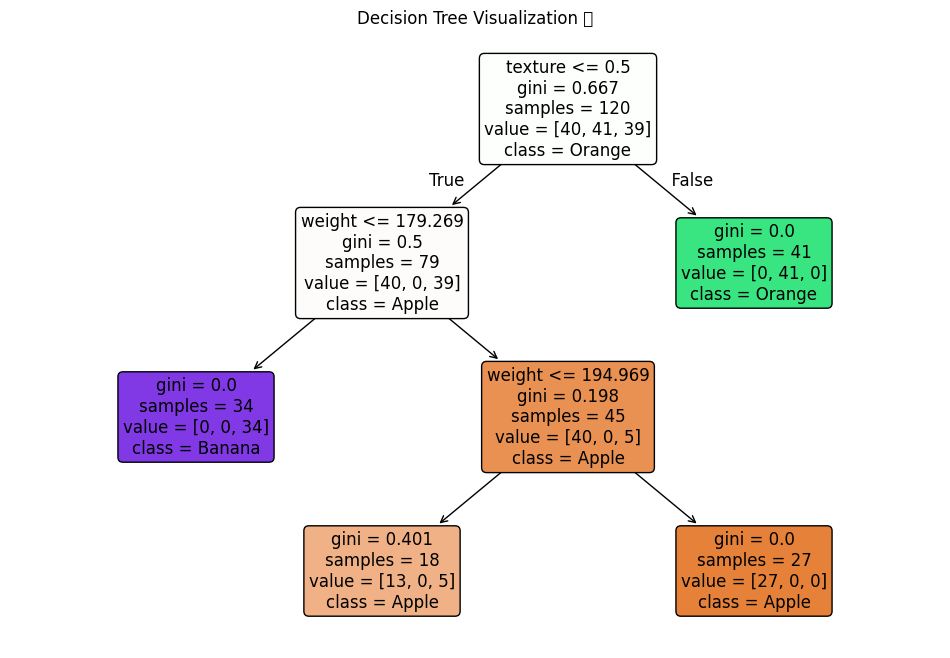

In [28]:
# ------------------------------------------
# Extra: Visualize the trained Decision Tree
# ------------------------------------------

# We need to import two functions to help us visualize the tree:
# - export_text: prints the tree rules as readable text
# - plot_tree: plots the tree graphically
from sklearn.tree import export_text, plot_tree
import matplotlib.pyplot as plt

# ------------------------------------------
# Step 1: Print the tree rules as text
# ------------------------------------------

# The Decision Tree model decides splits by minimizing "Gini impurity".
# Gini impurity measures how mixed the classes are in a group.
# The tree tries to create groups that are as pure as possible (all one fruit type).
# The printed rules show these splits, with conditions on features like "weight" or "texture".

print("🌳 Decision Tree Rules:\n")

# export_text takes the trained sklearn decision tree model
# and returns a string describing the splitting rules of the tree.
# We provide feature names to make it easier to read (instead of feature_0, feature_1).
rules = export_text(model.model, feature_names=["weight", "texture"])

# Print the tree rules
print(rules)

# ------------------------------------------
# Step 2: Plot the tree graphically
# ------------------------------------------

# Plotting the tree helps visualize how the model splits data at each node.
# Each node shows:
#  - The feature and condition used to split
#  - The number of samples that reach this node
#  - The Gini impurity of the node (lower is better, means purer)
#  - The predicted class for that node
# Filled colors show class distribution — clearer visual grouping!

plt.figure(figsize=(12, 8))  # Set figure size for readability

# plot_tree draws the tree graph.
# Arguments:
# - model.model: the trained decision tree
# - feature_names: to label features on splits
# - class_names: to label predicted classes (fruit types)
# - filled=True: colors nodes based on class purity
# - rounded=True: rounded corners for aesthetics
# - fontsize=12: readable font size for labels
plot_tree(
    model.model,
    feature_names=["weight", "texture"],
    class_names=["Apple", "Orange", "Banana"],
    filled=True,
    rounded=True,
    fontsize=12
)

# Add a title to the plot for clarity
plt.title("Decision Tree Visualization 🌳")

# Show the plot
plt.show()

